In [69]:
# from google.colab import drive
# drive.mount('/content/drive')

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Các bước tiền xử lý dữ liệu từ 5 bộ data thu thập từ [IMF](https://climatedata.imf.org/pages/climatechange-data ) (*Annual Surface Temperature Change*, *Atmospheric CO₂ Concentrations*, *Change in Mean Sea Levels*, *Climate-related Disasters Frequency*, *Forest and Carbon*):
* Lọc dữ liệu các quốc gia Châu Á, thống nhất tên nước.
* Kiểm tra tính đầy đủ của các chỉ số trong từng bộ.
* Lọc lại các dữ liệu cần thiết cho quá trình phân tích về sau.
* Kiểm tra và lọc dữ liệu theo năm.
* Gộp lại thành 1 bộ dữ liệu duy nhất cho mô hình.

## 51 quốc gia châu Á

In [71]:
# Đọc bộ dữ liệu các nước châu Á
asian = pd.read_csv('/content/drive/MyDrive/[Đạt]_DS105/Đồ Án DS105/[2]_Code/[Đạt]/asian_countries.csv')
asian

,Country,ISO3
0,Afghanistan,AFG
1,Armenia,ARM
2,Azerbaijan,AZE
3,Bahrain,BHR
4,Bangladesh,BGD
5,Bhutan,BTN
6,Brunei Darussalam,BRN
7,Cambodia,KHM
8,China,CHN
9,Cyprus,CYP


In [72]:
# Đọc các bộ dữ liệu ClimateChange
ast = pd.read_csv('/content/drive/MyDrive/[Đạt]_DS105/Đồ Án DS105/[1]_Data_[28_10]/Raw data/Annual Surface Temperature Change.csv') #Annual Surface Temperature Change
fac = pd.read_csv('/content/drive/MyDrive/[Đạt]_DS105/Đồ Án DS105/[1]_Data_[28_10]/Raw data/Forest_and_Carbon.csv') #Forest and Carbon
cdf = pd.read_csv('/content/drive/MyDrive/[Đạt]_DS105/Đồ Án DS105/[1]_Data_[28_10]/Raw data/Physical_Risks_Climate_related_disasters_frequency.csv') #Physical Risks: Climate-Related Disasters Frequency
msl = pd.read_csv('/content/drive/MyDrive/[Đạt]_DS105/Đồ Án DS105/[1]_Data_[28_10]/Raw data/Change in Mean Sea Levels(raw).csv') #Change in Mean Sea Levels
co2 = pd.read_csv('/content/drive/MyDrive/[Đạt]_DS105/Đồ Án DS105/[1]_Data_[28_10]/Raw data/Atmospheric CO₂ Concentrations.csv') #Atmospheric CO₂ Concentrations

## Annual Surface Temperature Change

In [73]:
asian_ast = pd.merge(ast, asian, on='ISO3')
asian_ast.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', 'Country_y'],
      dtype='object')

In [74]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_ast['Country_x'] = asian_ast['Country_y']
asian_ast = asian_ast.rename(columns={"Country_x": "Country"})
asian_ast = asian_ast.drop(['ObjectId', 'Country_y', 'ISO2', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor'], axis=1, errors='ignore')

### Kiểm tra missing value

In [75]:
def visualize_missing_values(df):
    year_columns = [col for col in df.columns if col.isdigit()]
    missing_values = df[year_columns].isnull().sum()

    # Plot the missing values
    plt.figure(figsize=(14,8))
    plt.bar(missing_values.index, missing_values.values, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values Over the Years')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def visualize_missing_by_country(df):
    year_columns = [col for col in df.columns if col.isdigit()]
    country_year_data = df[['Country'] + year_columns]
    missing_data = country_year_data.set_index('Country').isnull().astype(int)

    # Plot the heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(missing_data, cmap='YlGnBu', cbar_kws={'label': 'Missing Values (1 = Missing, 0 = Present)'})
    plt.title('Missing Values by Country Over Years')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

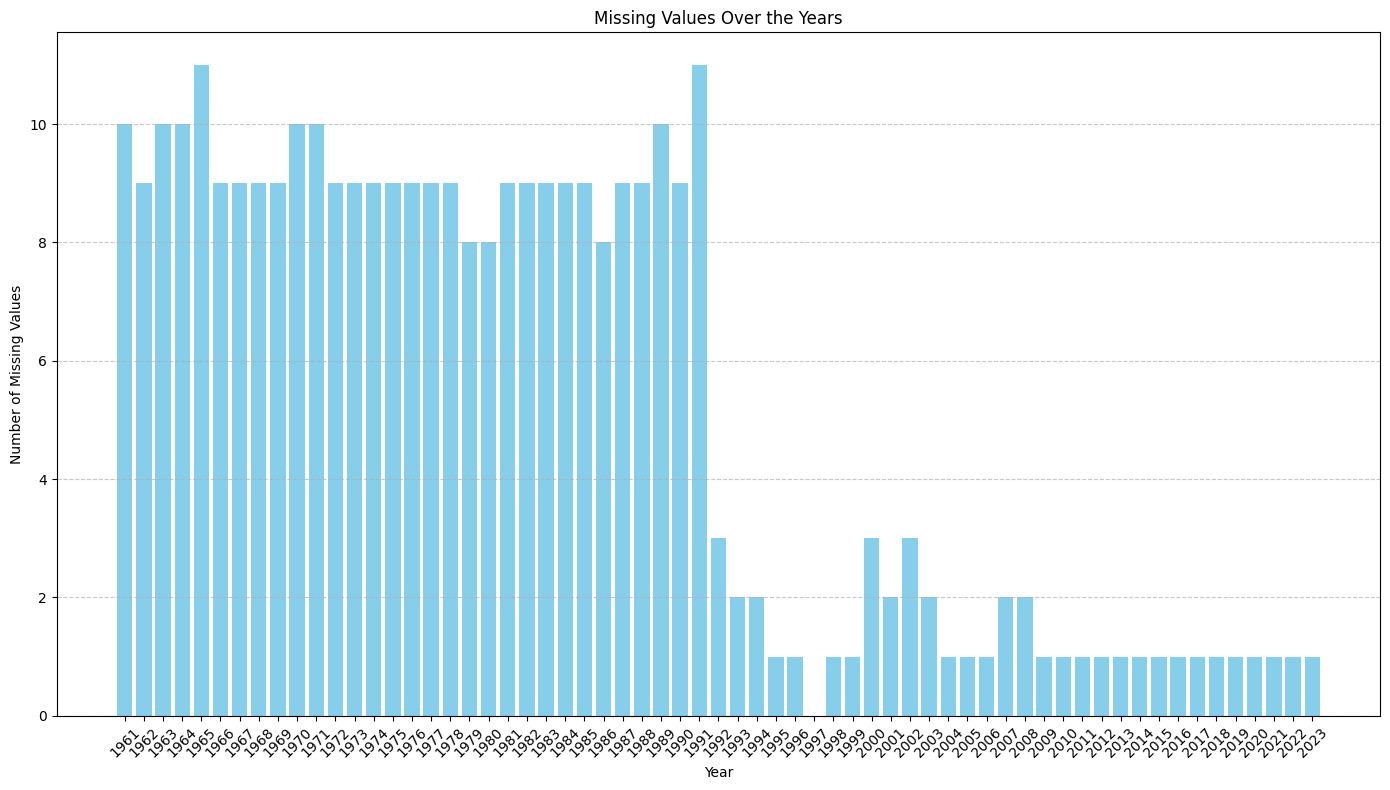

In [76]:
visualize_missing_values(asian_ast)

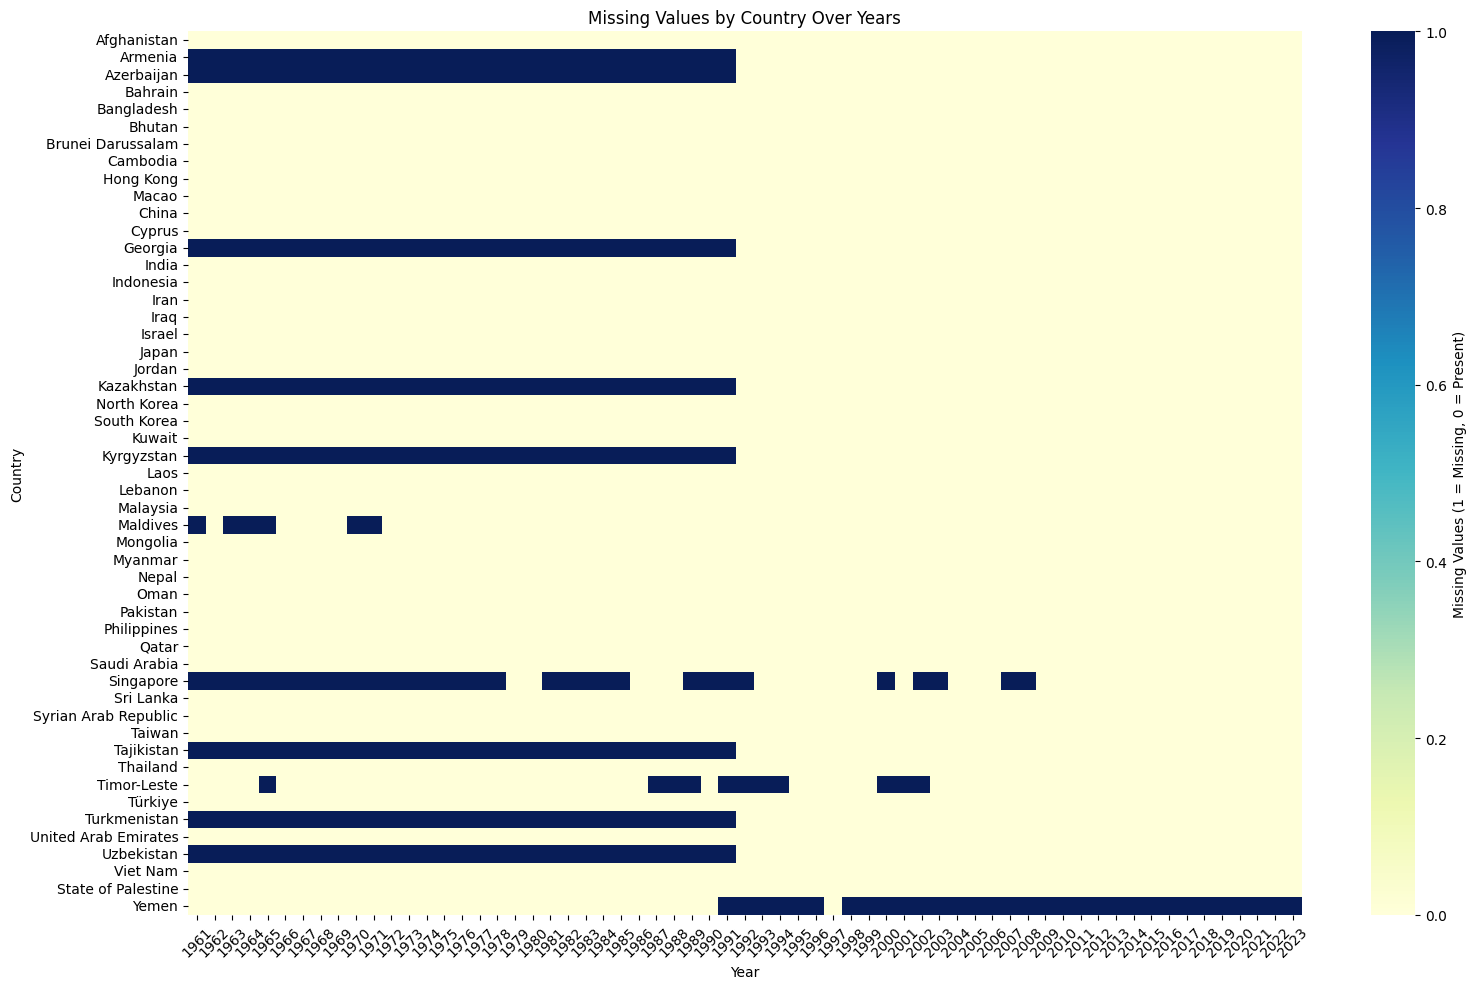

In [77]:
# Missing Values (1 = Missing, 0 = Present
visualize_missing_by_country(asian_ast)

Đối với bộ dữ liệu Annual Surface Temperature Change, dễ thấy số liệu bắt đầu ổn định từ năm 2016, tuy nhiên Yemen là quốc gia duy nhất có số liệu không ổn định trong khoảng thời gian này.

## Atmospheric CO₂ Concentrations

In [78]:
co2.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.71
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.27
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.87


In [79]:
co2['Unit'].unique()

array(['Parts Per Million', 'Percent'], dtype=object)

### Xử lý format

In [80]:
monthly_CO2_df_temp = co2[co2['Indicator'] == 'Monthly Atmospheric Carbon Dioxide Concentrations'].copy()
print(monthly_CO2_df_temp['Indicator'].unique())
print(monthly_CO2_df_temp['Unit'].unique())
monthly_CO2_df_temp.head()

['Monthly Atmospheric Carbon Dioxide Concentrations']
['Parts Per Million']


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.71
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.27
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.87


In [81]:
monthly_CO2_df_temp['Date'] = monthly_CO2_df_temp['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
monthly_CO2_df_temp['Date'] = monthly_CO2_df_temp['Date'].str.replace('M', '/', regex=False)
monthly_CO2_df_temp['Date'] = pd.to_datetime(monthly_CO2_df_temp['Date'], format='%Y/%m', errors='coerce')
monthly_CO2_df_temp['Year'] = monthly_CO2_df_temp['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
monthly_CO2_df_pivoted = monthly_CO2_df_temp.pivot_table(index=['Country'], columns='Year', values='Value', aggfunc='mean')
monthly_CO2_df_pivoted = monthly_CO2_df_pivoted.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = monthly_CO2_df_temp[['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
monthly_CO2_df_complete = pd.merge(additional_columns, monthly_CO2_df_pivoted, on='Country', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
monthly_CO2_df_complete['Indicator'] = 'Monthly Atmospheric Carbon Dioxide Concentrations'
monthly_CO2_df_unique = monthly_CO2_df_complete.drop_duplicates(subset=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source'])

monthly_CO2_df_unique.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,1958,1959,1960,1961,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,401.0125,404.4125,406.758333,408.715,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857


In [82]:
monthly_CO2_df_temp2 = co2[co2['Indicator'] == 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'].copy()
print(monthly_CO2_df_temp2['Indicator'].unique())
print(monthly_CO2_df_temp2['Unit'].unique())
monthly_CO2_df_temp2.head()

['Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change']
['Percent']


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
13,14,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M03,0.30
15,16,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M04,0.09
17,18,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M05,0.25
19,20,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M06,0.28
21,22,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M07,0.21


In [83]:
monthly_CO2_df_temp2['Date'] = monthly_CO2_df_temp2['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
monthly_CO2_df_temp2['Date'] = monthly_CO2_df_temp2['Date'].str.replace('M', '/', regex=False)
monthly_CO2_df_temp2['Date'] = pd.to_datetime(monthly_CO2_df_temp2['Date'], format='%Y/%m', errors='coerce')
monthly_CO2_df_temp2['Year'] = monthly_CO2_df_temp2['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
monthly_CO2_df_pivoted2 = monthly_CO2_df_temp2.pivot_table(index=['Country'], columns='Year', values='Value', aggfunc='mean')
monthly_CO2_df_pivoted2 = monthly_CO2_df_pivoted2.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = monthly_CO2_df_temp2[['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
monthly_CO2_df_complete2 = pd.merge(additional_columns, monthly_CO2_df_pivoted2, on='Country', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
monthly_CO2_df_complete2['Indicator'] = 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'
monthly_CO2_df_unique2 = monthly_CO2_df_complete2.drop_duplicates(subset=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source'])

monthly_CO2_df_unique2.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,1959,1960,1961,1962,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",0.234,0.2925,0.2325,0.255833,...,0.5525,0.848333,0.58,0.4825,0.7175,0.623333,0.530833,0.508333,0.608333,0.847143


In [84]:
aCO2c = pd.concat([monthly_CO2_df_unique, monthly_CO2_df_unique2], ignore_index=True)

In [85]:
aCO2c.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,1958,1959,1960,1961,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",NaN,0.234000,0.292500,0.232500,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143


In [86]:
co2_world = aCO2c.drop(['ISO2',  'Source'], axis=1, errors='ignore')
co2_world


,Country,ISO3,Indicator,Unit,1958,1959,1960,1961,1962,1963,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
1,World,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,NaN,0.234000,0.292500,0.232500,0.255833,0.168333,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143


### Kiểm tra missing value

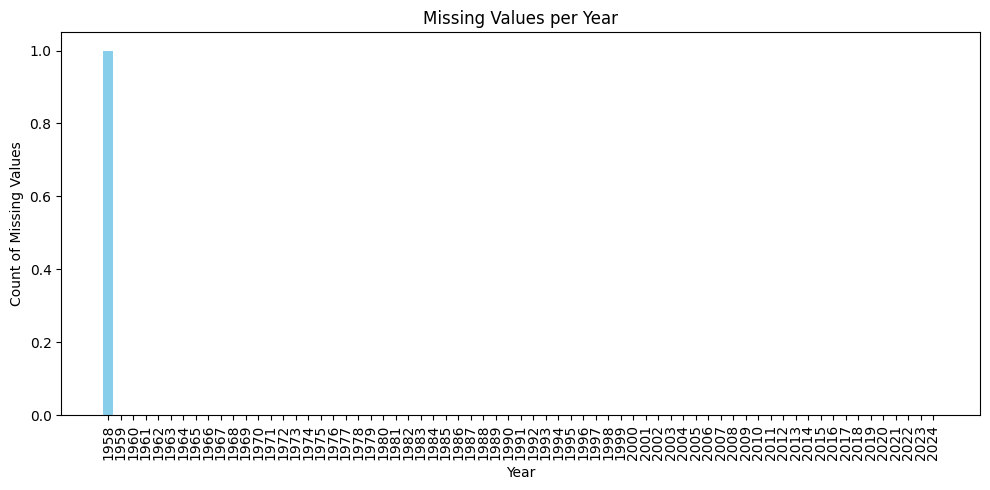

In [87]:
year_columns = [col for col in co2_world.columns if str(col).isdigit()]
missing_values = co2_world[year_columns].isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index.astype(str), missing_values.values, color='skyblue')
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Không có giá trị khuyết nào đối với chỉ số này

In [88]:
indicator_mapping = {
"Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change": "Yearly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change",
"Monthly Atmospheric Carbon Dioxide Concentrations": "Yearly Atmospheric Carbon Dioxide Concentrations"
}

co2_world['Indicator'] = co2_world['Indicator'].replace(indicator_mapping)

In [89]:
co2_world

,Country,ISO3,Indicator,Unit,1958,1959,1960,1961,1962,1963,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,WLD,Yearly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
1,World,WLD,Yearly Atmospheric Carbon Dioxide Concentratio...,Percent,NaN,0.234000,0.292500,0.232500,0.255833,0.168333,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143


## Change in Mean Sea Levels

In [90]:
msl.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,D12/16/1992,10.11
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,D12/17/1992,32.73
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,D12/17/1992,-14.88
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,D12/17/1992,-9.76
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66


### Xử format

In [91]:
msl['Date'] = msl['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
msl['Date'] = msl['Date'].str.replace('D', '', regex=False)
msl['Date'] = pd.to_datetime(msl['Date'], format='%m/%d/%Y', errors='coerce')
msl['Year'] = msl['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
data_pivoted = msl.pivot_table(index=['Measure'], columns='Year', values='Value', aggfunc='mean')
data_pivoted = data_pivoted.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = msl[['Measure', 'Country', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
data_complete = pd.merge(additional_columns, data_pivoted, on='Measure', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
data_complete['Indicator'] = 'Change in mean sea level: Sea level'
data_unique = data_complete.drop_duplicates(subset=['Measure', 'Country', 'ISO3', 'Indicator', 'Unit', 'Source'])

data_unique.head()

,Measure,Country,ISO3,Indicator,Unit,Source,1992,1993,1994,1995,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Adriatic Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-4.32,-43.352353,-14.461176,-18.405484,...,41.870541,40.263000,5.071800,67.494595,48.928571,49.055676,43.623243,40.335890,67.538571,77.761429
6,Andaman Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-12.13,-11.821176,-45.074118,1.073125,...,46.638378,118.080429,48.602549,59.548378,9.718649,86.420556,128.116486,120.405676,32.191429,20.615714
12,Arabian Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,3.09,-1.883529,-1.110000,3.727500,...,76.339189,76.094143,66.067843,46.890811,81.558378,94.704865,92.790000,74.707568,88.901429,79.972857
18,Atlantic Ocean,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-12.31,-18.151176,-14.660000,-7.892258,...,45.719189,49.254000,54.032353,60.154865,68.727838,67.125946,73.136081,73.060405,80.109286,75.495714
24,Baltic Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,216.55,-36.814706,-12.332353,25.759375,...,143.338378,56.301714,119.694902,34.972973,80.689189,176.454865,71.869054,126.682329,122.545000,191.640000


In [92]:
mean_sea_level = data_unique.drop(['Source'], axis=1, errors='ignore')
mean_sea_level

,Measure,Country,ISO3,Indicator,Unit,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Adriatic Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,-4.32,-43.352353,-14.461176,-18.405484,3.912353,...,41.870541,40.263000,5.071800,67.494595,48.928571,49.055676,43.623243,40.335890,67.538571,77.761429
6,Andaman Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,-12.13,-11.821176,-45.074118,1.073125,13.407879,...,46.638378,118.080429,48.602549,59.548378,9.718649,86.420556,128.116486,120.405676,32.191429,20.615714
12,Arabian Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,3.09,-1.883529,-1.110000,3.727500,-6.663030,...,76.339189,76.094143,66.067843,46.890811,81.558378,94.704865,92.790000,74.707568,88.901429,79.972857
18,Atlantic Ocean,World,WLD,Change in mean sea level: Sea level,Millimeters,-12.31,-18.151176,-14.660000,-7.892258,-6.821765,...,45.719189,49.254000,54.032353,60.154865,68.727838,67.125946,73.136081,73.060405,80.109286,75.495714
24,Baltic Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,216.55,-36.814706,-12.332353,25.759375,-108.362121,...,143.338378,56.301714,119.694902,34.972973,80.689189,176.454865,71.869054,126.682329,122.545000,191.640000
30,Bay Bengal,World,WLD,Change in mean sea level: Sea level,Millimeters,0.78,-9.378824,-20.293529,1.808125,4.269394,...,66.620000,99.705286,62.379412,48.374865,46.020811,87.056757,128.065541,105.695068,57.572143,17.611429
36,Bering Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,-25.09,-8.007647,-9.834118,16.145484,35.701176,...,63.991351,65.656286,49.166667,57.709189,48.995676,52.171081,37.193378,55.908243,60.643571,40.464286
42,Caribbean Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,-3.73,-11.368235,6.240588,-2.842903,-17.177059,...,73.442432,73.216571,39.422549,57.316486,84.367838,80.734054,70.994189,93.469041,101.337857,59.621429
48,Gulf Mexico,World,WLD,Change in mean sea level: Sea level,Millimeters,-7.37,-7.881765,-15.622941,-0.979375,-31.783636,...,80.267838,98.061571,74.394510,79.359459,108.878378,110.229189,99.437297,128.625479,133.255714,34.782857
54,Indian Ocean,World,WLD,Change in mean sea level: Sea level,Millimeters,-19.32,-19.002353,-16.178824,-10.155484,-9.734706,...,56.091351,47.808000,51.532941,52.160000,62.378919,65.412703,63.429595,73.045811,77.902143,87.905714


### Kiểm tra missing value

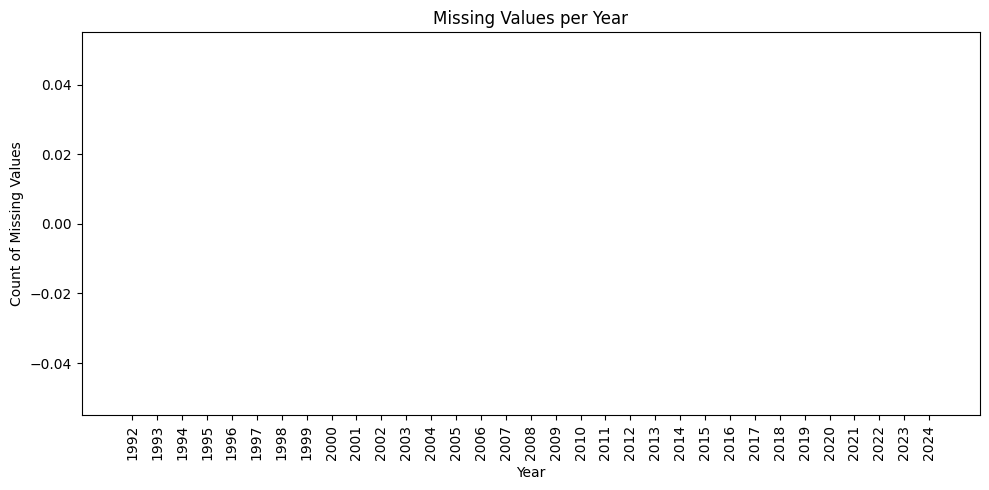

In [93]:
year_columns = [col for col in mean_sea_level.columns if str(col).isdigit()]
missing_values = mean_sea_level[year_columns].isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index.astype(str), missing_values.values, color='skyblue')
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Không có giá trị khuyết trong bộ dữ liệu.

## Climate-related Disasters Frequency

In [94]:
asian_cdf = pd.merge(cdf, asian, on='ISO3')
asian_cdf.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Source',
       'Country_y'],
      dtype='object')

In [95]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_cdf['Country_x'] = asian_cdf['Country_y']
asian_cdf = asian_cdf.rename(columns={"Country_x": "Country"})
asian_cdf = asian_cdf.drop(['ObjectId', 'Country_y', 'ISO2', 'Source'], axis=1, errors='ignore')
asian_cdf

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0,2.0
3,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN
4,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,State of Palestine,PSE,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
241,Yemen,YEM,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,3.0,5.0,2.0,3.0,1.0
242,Yemen,YEM,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,Yemen,YEM,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0


In [96]:
def check_missing_indicators(df):
    # Danh sách các giá trị unique trong cột 'Indicator'
    all_indicators = df['Indicator'].unique()

    # Group dữ liệu theo 'Country' và kiểm tra số lượng unique indicators cho mỗi quốc gia
    country_indicator_counts = df.groupby('Country')['Indicator'].nunique()

    # Tìm các quốc gia có số lượng indicator không bằng
    countries_with_missing_indicators = country_indicator_counts[country_indicator_counts != 7]

    # Lấy ra các quốc gia và các indicator bị thiếu
    missing_indicators_info = {}

    for country in countries_with_missing_indicators.index:
        # Lấy ra các indicator có mặt cho từng quốc gia
        present_indicators = df[df['Country'] == country]['Indicator'].unique()

        # Tính toán các indicator bị thiếu
        missing_indicators = set(all_indicators) - set(present_indicators)

        # Lưu kết quả vào dictionary
        missing_indicators_info[country] = list(missing_indicators)

    return missing_indicators_info

In [97]:
asian_cdf['Indicator'].unique()

array(['Climate related disasters frequency, Number of Disasters: Drought',
       'Climate related disasters frequency, Number of Disasters: Extreme temperature',
       'Climate related disasters frequency, Number of Disasters: Flood',
       'Climate related disasters frequency, Number of Disasters: Landslide',
       'Climate related disasters frequency, Number of Disasters: Storm',
       'Climate related disasters frequency, Number of Disasters: TOTAL',
       'Climate related disasters frequency, Number of Disasters: Wildfire'],
      dtype=object)

Bộ dữ liệu Land and Carbon gồm 7 indicator thể hiện số lần xảy ra các thiên tai trong năm của từng quốc gia :
* Hạn hán
* Nhiệt độ cực đoan(sự gia tằng nhiệt độ mức tối đa)
* Lũ lụt
* Lở đất
* Bão
* TỔNG SỐ
* Cháy rừng

#### Kiểm tra lại các chỉ số của các nước


In [98]:
indicator_mapping = {
"Climate related disasters frequency, Number of Disasters: Drought": "Drought",
"Climate related disasters frequency, Number of Disasters: Extreme temperature": "Extreme temperature",
"Climate related disasters frequency, Number of Disasters: Flood": "Flood",
"Climate related disasters frequency, Number of Disasters: Landslide": "Landslide",
"Climate related disasters frequency, Number of Disasters: Storm": "Storm",
"Climate related disasters frequency, Number of Disasters: TOTAL": "TOTAL",
"Climate related disasters frequency, Number of Disasters: Wildfire": "Wildfire"
}

asian_cdf['Indicator'] = asian_cdf['Indicator'].replace(indicator_mapping)

In [99]:
asian_cdf.replace(np.nan, 0, inplace=True)
asian_cdf

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Drought,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Afghanistan,AFG,Extreme temperature,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Afghanistan,AFG,Flood,Number of,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0,2.0
3,Afghanistan,AFG,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
4,Afghanistan,AFG,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,State of Palestine,PSE,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
241,Yemen,YEM,Flood,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,3.0,5.0,2.0,3.0,1.0
242,Yemen,YEM,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,Yemen,YEM,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [100]:
check_missing_indicators(asian_cdf)

{'Armenia': ['Wildfire'],
 'Azerbaijan': ['Wildfire', 'Storm'],
 'Bangladesh': ['Wildfire'],
 'Bhutan': ['Landslide', 'Drought', 'Extreme temperature'],
 'Brunei Darussalam': ['Extreme temperature',
  'Flood',
  'Storm',
  'Landslide',
  'Drought'],
 'Cambodia': ['Wildfire', 'Landslide', 'Extreme temperature'],
 'Cyprus': ['Landslide', 'Flood'],
 'Georgia': ['Wildfire', 'Landslide', 'Extreme temperature'],
 'Indonesia': ['Extreme temperature'],
 'Iran': ['Extreme temperature'],
 'Iraq': ['Wildfire', 'Landslide', 'Extreme temperature'],
 'Israel': ['Landslide'],
 'Japan': ['Drought'],
 'Jordan': ['Wildfire', 'Landslide'],
 'Kuwait': ['Extreme temperature',
  'Storm',
  'Wildfire',
  'Landslide',
  'Drought'],
 'Kyrgyzstan': ['Wildfire'],
 'Laos': ['Wildfire', 'Landslide', 'Extreme temperature'],
 'Lebanon': ['Landslide', 'Drought'],
 'Macao': ['Extreme temperature', 'Flood', 'Wildfire', 'Landslide', 'Drought'],
 'Malaysia': ['Extreme temperature'],
 'Maldives': ['Wildfire', 'Landslide',

In [101]:
# import pandas as pd

# def add_missing_indicators_with_default_values(df):
#     # Danh sách tất cả các indicator unique
#     all_indicators = df['Indicator'].unique()

#     # Tạo danh sách các cột dữ liệu năm
#     year_columns = [col for col in df.columns if col.isdigit()]

#     # Danh sách để lưu trữ các hàng cần thêm
#     rows_to_add = []

#     # Duyệt qua từng quốc gia
#     for country in df['Country'].unique():
#         # Lọc dữ liệu của quốc gia hiện tại
#         country_data = df[df['Country'] == country]

#         # Các indicator hiện có của quốc gia
#         present_indicators = country_data['Indicator'].unique()

#         # Các indicator bị thiếu
#         missing_indicators = set(all_indicators) - set(present_indicators)

#         # Nếu có indicator bị thiếu, tạo dòng dữ liệu mới
#         for missing_indicator in missing_indicators:
#             # Lấy mẫu của quốc gia để copy các thông tin ISO3
#             sample_row = country_data.iloc[0]

#             # Tạo dòng dữ liệu mới
#             new_row = {
#                 'Country': country,
#                 'Indicator': missing_indicator,
#                 'ISO3': sample_row['ISO3'],
#                 'Unit': 'Number of',  # Gán giá trị mặc định cho cột Unit
#             }

#             # Gán giá trị 0 cho các cột từ 2018 đến 2022
#             for year in year_columns:
#                 new_row[year] = 0

#             # Thêm dòng dữ liệu vào danh sách
#             rows_to_add.append(new_row)

#     # Chuyển danh sách các dòng dữ liệu mới thành DataFrame
#     new_rows_df = pd.DataFrame(rows_to_add)

#     # Kết hợp DataFrame gốc với các dòng dữ liệu mới
#     df = pd.concat([df, new_rows_df], ignore_index=True)

#     return df

# new_asian_cdf = add_missing_indicators_with_default_values(asian_cdf)
# new_asian_cdf

### Xử lỳ missing value và thiếu indicator

In [102]:
def add_missing_indicators_with_exceptions(df):
    # Danh sách tất cả các indicator unique
    all_indicators = df['Indicator'].unique()

    # Tạo danh sách các cột dữ liệu năm
    year_columns = [col for col in df.columns if col.isdigit()]

    # Danh sách để lưu trữ các hàng cần thêm
    rows_to_add = []

    # Xử lý các quốc gia đã có trong dữ liệu
    for country in df['Country'].unique():
        # Lọc dữ liệu của quốc gia hiện tại
        country_data = df[df['Country'] == country]

        # Các indicator hiện có của quốc gia
        present_indicators = country_data['Indicator'].unique()

        # Các indicator bị thiếu
        missing_indicators = set(all_indicators) - set(present_indicators)

        # Nếu có indicator bị thiếu, tạo dòng dữ liệu mới
        for missing_indicator in missing_indicators:
            # Lấy mẫu của quốc gia để copy các thông tin ISO3
            sample_row = country_data.iloc[0]

            # Tạo dòng dữ liệu mới
            new_row = {
                'Country': country,
                'Indicator': missing_indicator,
                'ISO3': sample_row['ISO3'],
                'Unit': 'Number of',  # Gán giá trị mặc định cho cột Unit
            }

            # Gán giá trị 0 cho các cột từ 2018 đến 2022
            for year in year_columns:
                new_row[year] = 0

            # Thêm dòng dữ liệu vào danh sách
            rows_to_add.append(new_row)

    # Xử lý ngoại lệ cho Singapore và Bahrain
    exception_countries = {'Singapore': 'SGP', 'Bahrain': 'BHR'}

    for country, iso3 in exception_countries.items():
        # Nếu quốc gia không tồn tại trong dữ liệu
        if country not in df['Country'].unique():
            # Thêm tất cả các indicator cho quốc gia đó
            for indicator in all_indicators:
                new_row = {
                    'Country': country,
                    'Indicator': indicator,
                    'ISO3': iso3,
                    'Unit': 'Number of',  # Gán giá trị mặc định cho cột Unit
                }

                # Gán giá trị 0 cho các cột từ 2018 đến 2022
                for year in year_columns:
                    new_row[year] = 0

                # Thêm dòng dữ liệu vào danh sách
                rows_to_add.append(new_row)

    # Chuyển danh sách các dòng dữ liệu mới thành DataFrame
    new_rows_df = pd.DataFrame(rows_to_add)

    # Kết hợp DataFrame gốc với các dòng dữ liệu mới
    df = pd.concat([df, new_rows_df], ignore_index=True)

    return df

new_asian_cdf = add_missing_indicators_with_exceptions(asian_cdf)
new_asian_cdf

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Drought,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Afghanistan,AFG,Extreme temperature,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Afghanistan,AFG,Flood,Number of,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0,2.0
3,Afghanistan,AFG,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
4,Afghanistan,AFG,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Bahrain,BHR,Flood,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,Bahrain,BHR,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,Bahrain,BHR,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355,Bahrain,BHR,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
asian_cdf[asian_cdf['Country'] == 'Viet Nam']

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
231,Viet Nam,VNM,Drought,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
232,Viet Nam,VNM,Flood,Number of,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,4.0,5.0,3.0,5.0,1.0,3.0,5.0,4.0
233,Viet Nam,VNM,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,Viet Nam,VNM,Storm,Number of,2.0,0.0,1.0,3.0,2.0,1.0,...,3.0,2.0,4.0,4.0,4.0,2.0,10.0,5.0,3.0,2.0
235,Viet Nam,VNM,TOTAL,Number of,3.0,0.0,1.0,3.0,3.0,2.0,...,3.0,5.0,8.0,9.0,7.0,8.0,11.0,8.0,8.0,6.0
236,Viet Nam,VNM,Wildfire,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
new_asian_cdf[new_asian_cdf['Country'] == 'Viet Nam']

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
231,Viet Nam,VNM,Drought,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
232,Viet Nam,VNM,Flood,Number of,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,4.0,5.0,3.0,5.0,1.0,3.0,5.0,4.0
233,Viet Nam,VNM,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,Viet Nam,VNM,Storm,Number of,2.0,0.0,1.0,3.0,2.0,1.0,...,3.0,2.0,4.0,4.0,4.0,2.0,10.0,5.0,3.0,2.0
235,Viet Nam,VNM,TOTAL,Number of,3.0,0.0,1.0,3.0,3.0,2.0,...,3.0,5.0,8.0,9.0,7.0,8.0,11.0,8.0,8.0,6.0
236,Viet Nam,VNM,Wildfire,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,Viet Nam,VNM,Extreme temperature,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
asian_cdf[asian_cdf['Country'] == 'United Arab Emirates']

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
225,United Arab Emirates,ARE,Flood,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
226,United Arab Emirates,ARE,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
new_asian_cdf[new_asian_cdf['Country'] == 'United Arab Emirates']

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
225,United Arab Emirates,ARE,Flood,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
226,United Arab Emirates,ARE,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
328,United Arab Emirates,ARE,Extreme temperature,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,United Arab Emirates,ARE,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,United Arab Emirates,ARE,Wildfire,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,United Arab Emirates,ARE,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,United Arab Emirates,ARE,Drought,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
check_missing_indicators(new_asian_cdf)

{}

## Forest and Carbon

In [108]:
asian_fac = pd.merge(fac, asian, on='ISO3')
asian_fac.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1992', 'F1993',
       'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001',
       'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009',
       'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
       'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'Country_y'],
      dtype='object')

In [109]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_fac['Country_x'] = asian_fac['Country_y']
asian_fac = asian_fac.rename(columns={"Country_x": "Country"})
asian_fac = asian_fac.drop(['ObjectId', 'Country_y', 'ISO2', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1, errors='ignore')
asian_fac

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Afghanistan,AFG,Forest area,1000 HA,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,...,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000
1,Afghanistan,AFG,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,Afghanistan,AFG,Land area,1000 HA,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,...,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000
3,Afghanistan,AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
4,Armenia,ARM,Carbon stocks in forests,Million tonnes,15.948900,15.913300,15.877700,15.842100,15.806500,15.770900,...,15.392100,15.413400,15.434700,15.424900,15.415000,15.405200,15.395400,15.385500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Yemen,YEM,Forest area,1000 HA,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,...,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
270,Yemen,YEM,Index of carbon stocks in forests,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
271,Yemen,YEM,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
272,Yemen,YEM,Land area,1000 HA,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,...,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000


In [110]:
asian_fac['Indicator'].unique()

array(['Forest area', 'Index of forest extent', 'Land area',
       'Share of forest area', 'Carbon stocks in forests',
       'Index of carbon stocks in forests'], dtype=object)

Bộ dữ liệu Land and Carbon gồm 6 indicator, trong đó nhóm sử dụng 3 chỉ số sau cho việc phân tích thăm dò:
* **Share of forest area:** Tỉ lệ diện tích rừng trên tổng diện tích đất
* **Forest Area:** Tổng diện tích rừng
* **Carbon stocks in forests :** Trữ lượng cac-bon trong rừng

Các chỉ số còn lại trong bộ dữ liệu:
* **Land Area:** Tổng diện tích đất
* **Index of forest extent:** Chỉ số diện tích rừng cho thấy quy mô của diện tích rừng trong một năm nhất định, so với năm gốc 1992(100).
* **Index of carbon stocks in forests:** Chỉ số cho thấy trữ lượng cac-bon trong sinh khối sống trong rừng của một năm nhất định so với năm cơ sở 1992(100).

In [111]:
asian_fac = asian_fac[asian_fac['Indicator'].isin(['Forest area', 'Share of forest area', 'Carbon stocks in forests'])]
asian_fac

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Afghanistan,AFG,Forest area,1000 HA,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,...,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000
3,Afghanistan,AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
4,Armenia,ARM,Carbon stocks in forests,Million tonnes,15.948900,15.913300,15.877700,15.842100,15.806500,15.770900,...,15.392100,15.413400,15.434700,15.424900,15.415000,15.405200,15.395400,15.385500,NaN,NaN
5,Armenia,ARM,Forest area,1000 HA,334.312000,334.103000,333.894000,333.685000,333.476000,333.267000,...,329.936000,329.728000,329.520000,329.310000,329.100000,328.890000,328.680000,328.470000,328.260000,328.050000
9,Armenia,ARM,Share of forest area,Percent,11.742606,11.735265,11.727924,11.720583,11.713242,11.705901,...,11.588901,11.581595,11.574289,11.566913,11.559536,11.552160,11.544784,11.537408,11.530032,11.522655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,State of Palestine,PSE,Forest area,1000 HA,9.080000,9.080000,9.080000,9.080000,9.080000,9.080000,...,10.064000,10.102000,10.140000,10.140000,10.140000,10.140000,10.140000,10.140000,10.140000,10.140000
267,State of Palestine,PSE,Share of forest area,Percent,1.508306,1.508306,1.508306,1.508306,1.508306,1.508306,...,1.671761,1.678073,1.684385,1.684385,1.684385,1.684385,1.684385,1.684385,1.682988,1.682988
268,Yemen,YEM,Carbon stocks in forests,Million tonnes,5.166100,5.166100,5.166100,5.166100,5.166100,5.166100,...,5.166100,5.166100,5.166100,5.166100,5.166100,5.166100,5.166100,5.166100,NaN,NaN
269,Yemen,YEM,Forest area,1000 HA,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,...,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000


In [112]:
forest_area = asian_fac[asian_fac['Indicator']=='Forest area']
forest_area

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Afghanistan,AFG,Forest area,1000 HA,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,...,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.44,1208.44,1208.4400,1208.4400
5,Armenia,ARM,Forest area,1000 HA,334.3120,334.1030,333.8940,333.6850,333.4760,333.2670,...,329.9360,329.7280,329.5200,329.3100,329.1000,328.8900,328.68,328.47,328.2600,328.0500
10,Azerbaijan,AZE,Forest area,1000 HA,953.2360,957.4840,961.7320,965.9800,970.2280,974.4760,...,1059.7300,1068.8085,1077.8870,1087.4752,1097.1848,1108.7150,1120.24,1131.77,1143.2967,1154.8256
14,Bahrain,BHR,Forest area,1000 HA,0.2500,0.2650,0.2800,0.2950,0.3100,0.3250,...,0.5680,0.5840,0.6000,0.6200,0.6400,0.6600,0.68,0.70,0.7200,0.7400
19,Bangladesh,BGD,Forest area,1000 HA,1920.3296,1920.3294,1920.3292,1920.3290,1920.3289,1920.3287,...,1885.3768,1884.3884,1883.4000,1883.4000,1883.4000,1883.4000,1883.40,1883.40,1883.4000,1883.4000
25,Bhutan,BTN,Forest area,1000 HA,2526.5760,2536.5040,2546.4320,2556.3600,2566.2880,2576.2160,...,2711.2240,2713.2020,2715.1800,2717.1600,2719.1400,2721.1200,2723.10,2725.08,2727.0600,2729.0400
31,Brunei Darussalam,BRN,Forest area,1000 HA,409.8000,408.2000,406.6000,405.0000,403.4000,401.8000,...,380.0000,380.0000,380.0000,380.0000,380.0000,380.0000,380.00,380.00,380.0000,380.0000
37,Cambodia,KHM,Forest area,1000 HA,10960.0320,10937.6530,10915.2740,10892.8950,10870.5160,10848.1370,...,9543.7840,9195.3020,8846.8200,8691.1300,8535.4400,8379.7500,8224.06,8068.37,7912.6800,7756.9900
43,China,CHN,Forest area,1000 HA,161112.5820,163098.5780,165084.5740,167070.5700,169056.5660,171042.5620,...,206420.7020,208357.4760,210294.2500,212459.8670,214339.4700,216219.0400,218098.61,219978.18,221857.7500,223737.3200
49,Cyprus,CYP,Forest area,1000 HA,163.2100,164.2600,165.3100,166.3600,167.4100,168.4600,...,172.7620,172.7360,172.7100,172.6100,172.5900,172.5700,172.55,172.53,172.5100,172.4900


In [113]:
forest_area['Country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Türkiye', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
       'Viet Nam', 'State of Palestine', 'Yemen'], dtype=object)

In [114]:
forest_area['Country'].nunique()

48

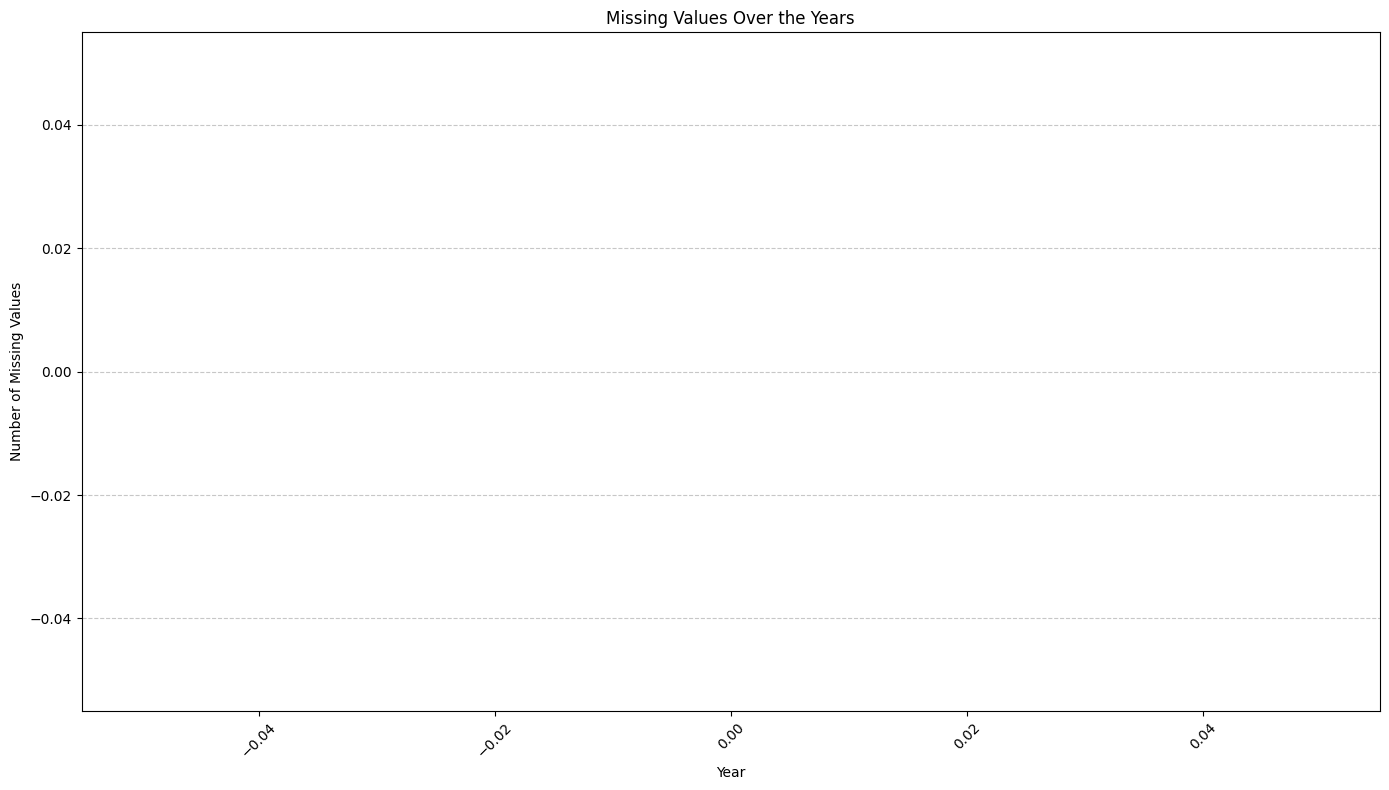

In [115]:
visualize_missing_values(forest_area)

Đối với chỉ số *'Forest area'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của các quốc gia Hong Kong, Macao và Taiwan.

In [116]:
shared_area = asian_fac[asian_fac['Indicator']=='Share of forest area']
shared_area

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
3,Afghanistan,AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
9,Armenia,ARM,Share of forest area,Percent,11.742606,11.735265,11.727924,11.720583,11.713242,11.705901,...,11.588901,11.581595,11.574289,11.566913,11.559536,11.552160,11.544784,11.537408,11.530032,11.522655
13,Azerbaijan,AZE,Share of forest area,Percent,11.454823,11.505870,11.556917,11.607965,11.659012,11.710059,...,12.820504,12.929709,13.039534,13.154412,13.273146,13.413930,13.553367,13.694190,13.832991,13.972482
17,Bahrain,BHR,Share of forest area,Percent,0.352113,0.373239,0.394366,0.415493,0.436620,0.457746,...,0.737662,0.757458,0.771208,0.795892,0.820513,0.848329,0.871795,0.891720,0.911392,0.936709
23,Bangladesh,BGD,Share of forest area,Percent,14.752474,14.752473,14.752471,14.752470,14.752469,14.752468,...,14.483958,14.476365,14.468772,14.468772,14.468772,14.468772,14.468772,14.468772,14.468772,14.468772
29,Bhutan,BTN,Share of forest area,Percent,54.075637,54.288124,63.980704,64.230151,64.479598,64.729045,...,71.128998,71.180890,71.232783,71.234270,71.286179,71.345569,71.397483,71.449397,71.501311,71.553225
35,Brunei Darussalam,BRN,Share of forest area,Percent,77.760911,77.457306,77.153700,76.850095,76.546490,76.242884,...,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262
41,Cambodia,KHM,Share of forest area,Percent,62.089463,61.962684,61.835905,61.709126,61.582348,61.455569,...,54.066304,52.092126,50.117947,49.235951,48.353954,47.471958,46.589961,45.707965,44.825969,43.943972
47,China,CHN,Share of forest area,Percent,17.161088,17.372628,17.584169,17.795728,18.007288,18.218830,...,21.987224,22.193523,22.399821,22.630498,22.830707,23.030912,23.231118,23.431323,23.631528,23.831734
53,Cyprus,CYP,Share of forest area,Percent,17.663420,17.777056,17.890693,18.004329,18.117965,18.231602,...,18.697186,18.694372,18.691558,18.680736,18.678571,18.676407,18.674242,18.672078,18.669913,18.667749


In [117]:
shared_area['Country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Türkiye', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
       'Viet Nam', 'State of Palestine', 'Yemen'], dtype=object)

In [118]:
shared_area['Country'].nunique()

48

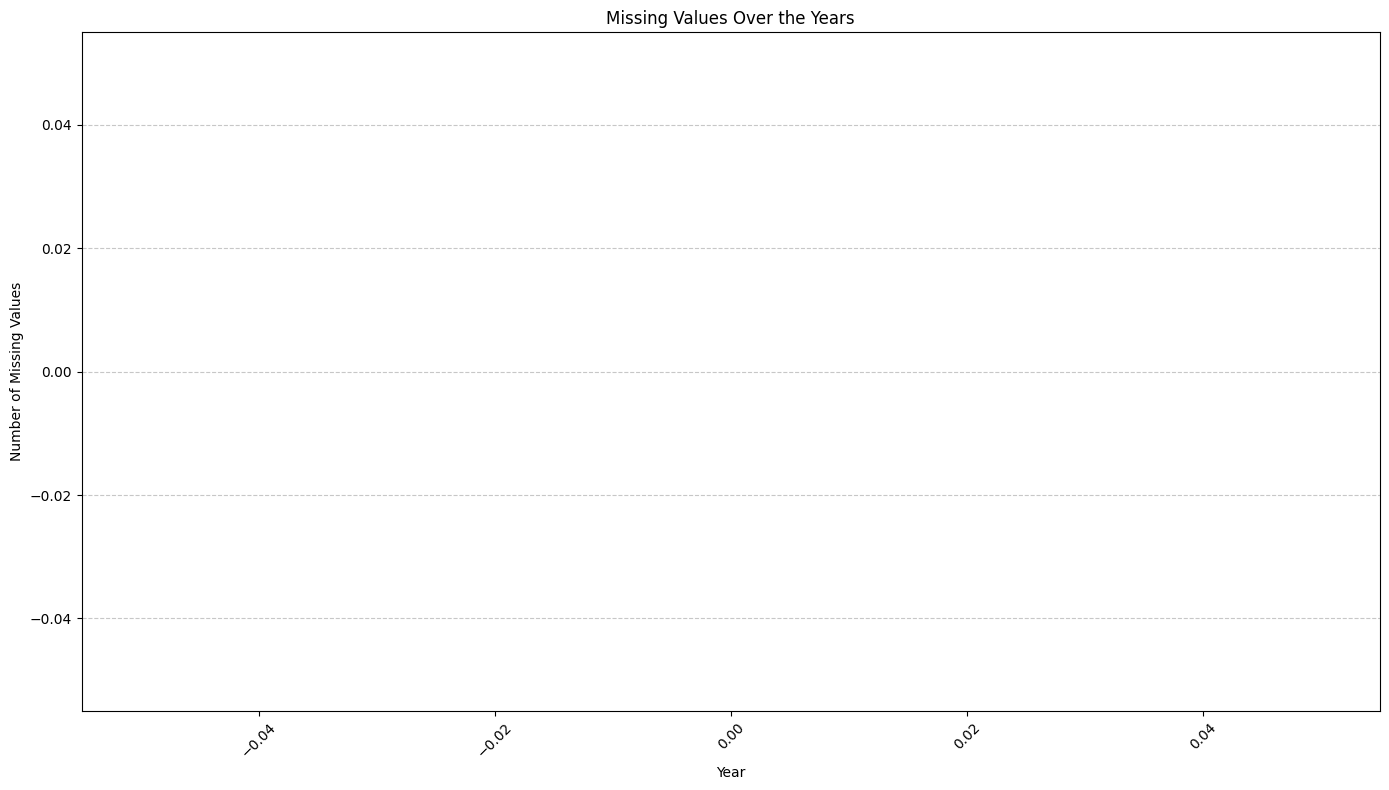

In [119]:
visualize_missing_values(shared_area)

Đối với chỉ số *'Share of forest area'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của các quốc gia Hong Kong, Macao và Taiwan.

In [120]:
carbon_in_forest = asian_fac[asian_fac['Indicator']=='Carbon stocks in forests']
carbon_in_forest

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
4,Armenia,ARM,Carbon stocks in forests,Million tonnes,15.9489,15.9133,15.8777,15.8421,15.8065,15.7709,...,15.3921,15.4134,15.4347,15.4249,15.4150,15.4052,15.3954,15.3855,NaN,NaN
18,Bangladesh,BGD,Carbon stocks in forests,Million tonnes,83.5919,83.5919,83.5919,83.5919,83.5919,83.5919,...,82.0705,82.0274,81.9844,81.9844,81.9844,81.9844,81.9844,81.9844,NaN,NaN
24,Bhutan,BTN,Carbon stocks in forests,Million tonnes,458.7504,460.5530,462.3557,464.1583,465.9609,467.7635,...,492.2769,492.6361,492.9952,493.3547,493.7142,494.0738,494.4333,494.7928,NaN,NaN
30,Brunei Darussalam,BRN,Carbon stocks in forests,Million tonnes,58.9907,58.7604,58.5301,58.2998,58.0694,57.8391,...,54.7010,54.7010,54.7010,54.7010,54.7010,54.7010,54.7010,54.7010,NaN,NaN
36,Cambodia,KHM,Carbon stocks in forests,Million tonnes,556.8792,555.7421,554.6051,553.4680,552.3309,551.1938,...,484.9197,467.2133,449.5069,441.5963,433.6857,425.7751,417.8645,409.9539,NaN,NaN
42,China,CHN,Carbon stocks in forests,Million tonnes,5188.5163,5284.2391,5379.9619,5475.6846,5571.4074,5667.1302,...,7447.2931,7641.4284,7835.5638,8047.9798,8217.7753,8387.1366,8553.8275,8724.3346,NaN,NaN
48,Cyprus,CYP,Carbon stocks in forests,Million tonnes,2.7107,2.7297,2.7487,2.7676,2.7866,2.8056,...,3.8408,3.9273,4.0138,4.0805,4.1473,4.2176,4.2827,4.3529,NaN,NaN
54,Georgia,GEO,Carbon stocks in forests,Million tonnes,162.8544,167.8364,172.8185,177.8006,182.7826,187.7647,...,212.3009,212.3009,212.3009,212.3009,212.3009,212.3009,212.3009,212.3009,NaN,NaN
60,India,IND,Carbon stocks in forests,Million tonnes,2342.6833,2404.7006,2466.7180,2528.7353,2590.7526,2652.7700,...,2900.5718,2919.9669,2939.3620,2950.4176,2961.4732,2972.5288,2983.5844,2994.6400,NaN,NaN
66,Indonesia,IDN,Carbon stocks in forests,Million tonnes,11043.7016,10979.1193,10914.5370,10849.9547,10785.3724,10720.7901,...,10105.8237,10008.6168,9911.4100,9933.9906,9798.9641,9735.8074,9672.6495,9609.4928,NaN,NaN


In [121]:
carbon_in_forest['Country'].unique()

array(['Armenia', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia',
       'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'North Korea',
       'South Korea', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
       'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan',
       'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Thailand', 'Timor-Leste', 'Türkiye',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam',
       'Yemen'], dtype=object)

In [122]:
carbon_in_forest['Country'].nunique()

42

In [143]:
carbon_in_forest[carbon_in_forest['Country']=='Viet Nam']

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
258,Viet Nam,VNM,Carbon stocks in forests,Million tonnes,350.1345,371.3423,392.5501,413.7578,434.9656,456.1734,...,507.3823,514.9605,522.5387,530.5364,538.8473,542.2641,542.9192,546.1873,NaN,NaN


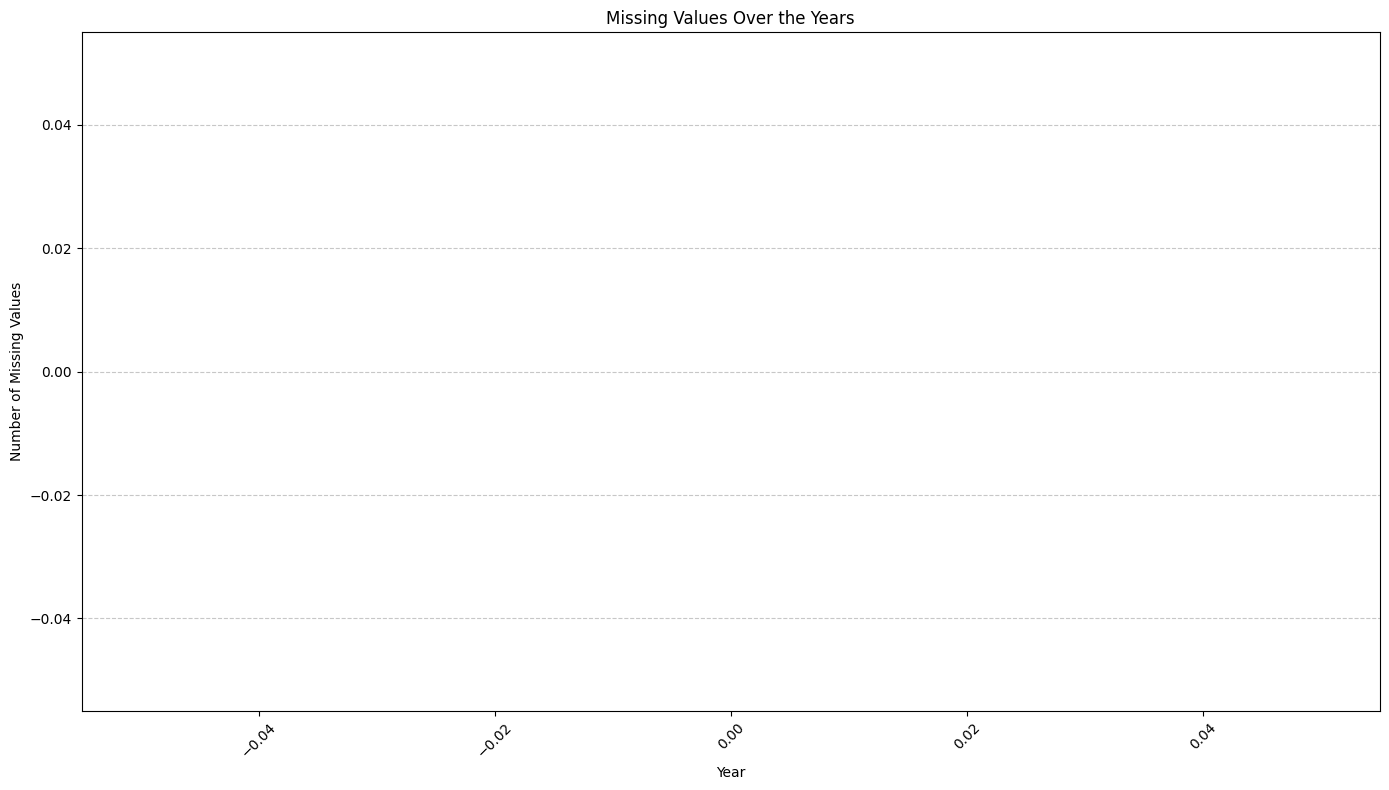

In [123]:
visualize_missing_values(carbon_in_forest)

Đối với chỉ số *'Carbon stocks in forests'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của 9 quốc gia Afghanistan, Azerbaijan, Bahrain, Kuwait, Hong Kong, Macao, Taiwan, Tajikistan và State of Palestine

In [124]:
check_missing_indicators(asian_fac)

{'Afghanistan': ['Carbon stocks in forests'],
 'Armenia': [],
 'Azerbaijan': ['Carbon stocks in forests'],
 'Bahrain': ['Carbon stocks in forests'],
 'Bangladesh': [],
 'Bhutan': [],
 'Brunei Darussalam': [],
 'Cambodia': [],
 'China': [],
 'Cyprus': [],
 'Georgia': [],
 'India': [],
 'Indonesia': [],
 'Iran': [],
 'Iraq': [],
 'Israel': [],
 'Japan': [],
 'Jordan': [],
 'Kazakhstan': [],
 'Kuwait': ['Carbon stocks in forests'],
 'Kyrgyzstan': [],
 'Laos': [],
 'Lebanon': [],
 'Malaysia': [],
 'Maldives': [],
 'Mongolia': [],
 'Myanmar': [],
 'Nepal': [],
 'North Korea': [],
 'Oman': [],
 'Pakistan': [],
 'Philippines': [],
 'Qatar': [],
 'Saudi Arabia': [],
 'Singapore': [],
 'South Korea': [],
 'Sri Lanka': [],
 'State of Palestine': ['Carbon stocks in forests'],
 'Syrian Arab Republic': [],
 'Tajikistan': ['Carbon stocks in forests'],
 'Thailand': [],
 'Timor-Leste': [],
 'Turkmenistan': [],
 'Türkiye': [],
 'United Arab Emirates': [],
 'Uzbekistan': [],
 'Viet Nam': [],
 'Yemen': [

## Concat AST, FAC, CDF

In [125]:
asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)

<ipython-input-125-1e34d60bac96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)


In [126]:
asian_ast2 = asian_ast[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020', '2021', '2022']]
asian_fac2 = asian_fac[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020', '2021', '2022']]
asian_cdf2 = new_asian_cdf[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020', '2021', '2022']]

In [127]:
df = pd.concat([asian_ast2, asian_fac2, asian_cdf2], axis=0, ignore_index=True)

In [128]:
df

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,Afghanistan,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1.624,0.991,0.587,1.475,2.154
1,Armenia,ARM,Temperature change with respect to a baseline ...,Degree Celsius,2.739,1.864,1.954,2.183,1.845
2,Azerbaijan,AZE,Temperature change with respect to a baseline ...,Degree Celsius,2.131,1.878,1.889,1.958,2.029
3,Bahrain,BHR,Temperature change with respect to a baseline ...,Degree Celsius,2.280,2.127,1.989,2.421,1.971
4,Bangladesh,BGD,Temperature change with respect to a baseline ...,Degree Celsius,0.911,1.151,0.934,1.326,1.240
...,...,...,...,...,...,...,...,...,...
541,Bahrain,BHR,Flood,Number of,0.000,0.000,0.000,0.000,0.000
542,Bahrain,BHR,Landslide,Number of,0.000,0.000,0.000,0.000,0.000
543,Bahrain,BHR,Storm,Number of,0.000,0.000,0.000,0.000,0.000
544,Bahrain,BHR,TOTAL,Number of,0.000,0.000,0.000,0.000,0.000


In [129]:
check_missing_indicators(df)

{'Afghanistan': ['Carbon stocks in forests'],
 'Armenia': [],
 'Azerbaijan': ['Carbon stocks in forests'],
 'Bahrain': ['Carbon stocks in forests'],
 'Bangladesh': [],
 'Bhutan': [],
 'Brunei Darussalam': [],
 'Cambodia': [],
 'China': [],
 'Cyprus': [],
 'Georgia': [],
 'Hong Kong': ['Forest area',
  'Share of forest area',
  'Carbon stocks in forests'],
 'India': [],
 'Indonesia': [],
 'Iran': [],
 'Iraq': [],
 'Israel': [],
 'Japan': [],
 'Jordan': [],
 'Kazakhstan': [],
 'Kuwait': ['Carbon stocks in forests'],
 'Kyrgyzstan': [],
 'Laos': [],
 'Lebanon': [],
 'Macao': ['Forest area', 'Share of forest area', 'Carbon stocks in forests'],
 'Malaysia': [],
 'Maldives': [],
 'Mongolia': [],
 'Myanmar': [],
 'Nepal': [],
 'North Korea': [],
 'Oman': [],
 'Pakistan': [],
 'Philippines': [],
 'Qatar': [],
 'Saudi Arabia': [],
 'Singapore': [],
 'South Korea': [],
 'Sri Lanka': [],
 'State of Palestine': ['Carbon stocks in forests'],
 'Syrian Arab Republic': [],
 'Taiwan': ['Forest area', 'S

Loại Taiwan, Macao, Hong Kong, Afghanistan, Azerbaijan, Bahrain, Kuwait, State of Palestine, Tajikistan

## Lọc và tạo bộ dữ liệu cuối cùng

In [130]:
def remove_specific_countries(df):
    # Danh sách các quốc gia cần loại bỏ
    countries_to_remove = [
        'Taiwan', 'Macao', 'Hong Kong', 'Afghanistan',
        'Azerbaijan', 'Bahrain', 'Kuwait', 'State of Palestine', 'Tajikistan', 'Yemen'
    ]

    # Lọc bỏ các quốc gia có tên trong danh sách
    df = df[~df['Country'].isin(countries_to_remove)]
    return df

In [131]:
def preprocess_finaldata(df, output_path):
    '''
    Sau khi xem xét các phân tích và giá trị của dữ liệu. Nhóm lựa chọn giữ lại dữ liệu trong khoảng 2018-2022 làm dữ liệu phân tích chính.
    Trong đó các thuộc tính ['Country', 'ISO3', 'Indicator','Unit' được giữ lại cho bộ dữ liệu cuối cùng này.
    '''

    df = df[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020', '2021', '2022']]

    df.to_csv(output_path, index=False)

    # Return the preprocessed DataFrame
    return df

In [132]:
# lưu lại các bộ dữ liệu đã xử lý cơ bản

path = '/content/asian_ast.csv'
asian_ast = remove_specific_countries(asian_ast)
preprocess_finaldata(asian_ast, path)

path = '/content/asian_fac.csv'
asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)
asian_fac = remove_specific_countries(asian_fac)
preprocess_finaldata(asian_fac, path)

path = '/content/asian_cdf.csv'
new_asian_cdf = remove_specific_countries(new_asian_cdf)
preprocess_finaldata(new_asian_cdf, path)

path = '/content/msl.csv'
mean_sea_level = mean_sea_level[['Country', 'Measure', 'ISO3', 'Indicator', 'Unit', 2018, 2019, 2020, 2021, 2022]]
mean_sea_level.to_csv(path, index=False)

path = '/content/co2.csv'
co2_world = co2_world[['Country', 'ISO3', 'Indicator', 'Unit', 2018, 2019, 2020, 2021, 2022]]
co2_world.to_csv(path, index=False)

<ipython-input-132-4d9b0d9782fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)


In [133]:
asian_ast = pd.read_csv('/content/asian_ast.csv')
asian_cdf = pd.read_csv('/content/asian_cdf.csv')
co2 = pd.read_csv('/content/co2.csv')
asian_fac = pd.read_csv('/content/asian_fac.csv')
msl = pd.read_csv('/content/msl.csv')

In [134]:
# Nối các DataFrame lại với nhau
df_final = pd.concat([asian_ast, asian_cdf, co2, asian_fac, msl], axis=0, ignore_index=True)
df_final

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022,Measure
0,Armenia,ARM,Temperature change with respect to a baseline ...,Degree Celsius,2.739000,1.864000,1.954000,2.183000,1.845000,NaN
1,Bangladesh,BGD,Temperature change with respect to a baseline ...,Degree Celsius,0.911000,1.151000,0.934000,1.326000,1.240000,NaN
2,Bhutan,BTN,Temperature change with respect to a baseline ...,Degree Celsius,1.221000,1.136000,1.035000,1.648000,1.456000,NaN
3,Brunei Darussalam,BRN,Temperature change with respect to a baseline ...,Degree Celsius,0.903000,1.221000,1.222000,0.972000,1.048000,NaN
4,Cambodia,KHM,Temperature change with respect to a baseline ...,Degree Celsius,0.655000,1.370000,1.275000,0.786000,0.886000,NaN
...,...,...,...,...,...,...,...,...,...,...
473,World,WLD,Change in mean sea level: Sea level,Millimeters,50.945676,57.397027,79.274054,91.480135,121.407162,South China
474,World,WLD,Change in mean sea level: Sea level,Millimeters,56.553514,62.407568,62.722432,67.678514,72.066351,Southern Ocean
475,World,WLD,Change in mean sea level: Sea level,Millimeters,57.667838,65.216486,67.589189,72.304730,74.039865,Tropics
476,World,WLD,Change in mean sea level: Sea level,Millimeters,57.700270,64.094865,66.817027,71.507568,73.794054,World


In [135]:
df_final['Indicator'].value_counts()

,count
Indicator,
"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980",41
Drought,41
Extreme temperature,41
Flood,41
Landslide,41
Storm,41
TOTAL,41
Wildfire,41
Carbon stocks in forests,41


In [137]:
df_final.to_csv('/content/final_data.csv', index=False)

# Dữ liệu cho huấn luyện

In [138]:
lst = ['Change in mean sea level: Sea level', 'Yearly Atmospheric Carbon Dioxide Concentrations', 'Yearly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change']

df_model = df_final[~df_final['Indicator'].isin(lst)]

In [139]:
df_model['Indicator'].value_counts()

,count
Indicator,
"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980",41
Drought,41
Extreme temperature,41
Flood,41
Landslide,41
Storm,41
TOTAL,41
Wildfire,41
Carbon stocks in forests,41


In [140]:
import pandas as pd

def data_for_model(data):
  data = data[['Country', 'Indicator'] + [f'{year}' for year in range(2018, 2023)]]

  # Chuyển đổi dữ liệu từ wide format sang long format (melt)
  df_melted = data.melt(id_vars=['Country', 'Indicator'], var_name='Year', value_name='Value')

  # Pivot dữ liệu để mỗi feature là một cột riêng biệt
  df_pivoted = df_melted.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Value', aggfunc='first').reset_index()
  return df_pivoted


df_model = data_for_model(df_model)

In [141]:
df_model

Indicator,Country,Year,Carbon stocks in forests,Drought,Extreme temperature,Flood,Forest area,Landslide,Share of forest area,Storm,TOTAL,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980",Wildfire
0,Armenia,2018,15.4052,0.0,0.0,0.0,328.89,0.0,11.552160,1.0,1.0,2.739,0.0
1,Armenia,2019,15.3954,0.0,0.0,0.0,328.68,0.0,11.544784,1.0,1.0,1.864,0.0
2,Armenia,2020,15.3855,0.0,0.0,0.0,328.47,0.0,11.537408,1.0,1.0,1.954,0.0
3,Armenia,2021,NaN,0.0,0.0,0.0,328.26,0.0,11.530032,0.0,0.0,2.183,0.0
4,Armenia,2022,NaN,0.0,0.0,0.0,328.05,0.0,11.522655,0.0,0.0,1.845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Viet Nam,2018,542.2641,0.0,0.0,3.0,14491.29,0.0,46.234682,4.0,7.0,0.780,0.0
201,Viet Nam,2019,542.9192,1.0,0.0,5.0,14567.19,0.0,46.476842,2.0,8.0,1.734,0.0
202,Viet Nam,2020,546.1873,0.0,0.0,1.0,14643.09,0.0,46.719002,10.0,11.0,1.418,0.0
203,Viet Nam,2021,NaN,0.0,0.0,3.0,14718.99,0.0,46.961162,5.0,8.0,1.025,0.0


In [142]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country                                                                                           205 non-null    object 
 1   Year                                                                                              205 non-null    object 
 2   Carbon stocks in forests                                                                          123 non-null    float64
 3   Drought                                                                                           205 non-null    float64
 4   Extreme temperature                                                                               205 non-null    float64
 5   F

In [144]:
df_model.to_csv('/content/data_model.csv', index=False)